<a href="https://colab.research.google.com/github/felipe0fc/NLP_DiretrizesLula2023/blob/main/NLP_DiretrizesLula2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Junho de 2022
#**ANÁLISE DE DADOS LINGUÍSTICOS DAS DIRETRIZES PARA O PROGRAMA DE RECONSTRUÇÃO DO BRASIL LULA 2023-2026**
##*Felipe Ferreira de Carvalho*

  Em consulta popular, o Partido dos Trabalhadores (PT) e o candidato a presidência Luíz Inácio "Lula" da Silva, disponibiliza as Diretrizes para o Programa de Reconstrução do Brasil Lula 2023-2026 em um documento PDF contendo dezoito páginas de texto.

  A análise linguística destes documento nos fornece ferramentas adicionais de visualização direta e comparativa das ideias e sentimentos discutidos no texto. Sendo potencialmente um instrumento de apoio a tomada de decisão em termos de identificação de candidados para as eleições vigentes no período.

  Este Jupyter Notebook tem como propósito análisar os dados textuais contidos no documento discutido para a produção de insights a cerca das diretrizes propostas e estabelecer métodos reprodutíveis para comparação com diretrizes de outros candidatos.

  Este é um trabalho isento de juizo de valor e/ou comprometimento político com qualquer das entidades citadas. O autor declara não haver conflitos de interesses no desenvolvimento e publicação deste conteúdo.

Fonte: https://cdn.brasildefato.com.br/documents/d724fc75f5aa971286e5ce54827bc748.pdf


## Informações técnicas e autorais
*   **Versão**: 1.0

*   **Tecnologias Utilizadas:** Python, SpaCy, NLTK

*   **Autor:** Felipe Ferreira de Carvalho

*   **E-mail:** felipefcnano@gmail.com

*   **LinkedIn:** https://www.linkedin.com/in/felipefcnano/


Este é um documento Open Source, sinta-se livre para utilizá-lo e reproduzí-lo da maneiro que bem entender. Porém, ao copiar códigos, dados ou informações, lembre-se de deixar créditos à quem te ajudou. 
Toda comunidade agradece!



# Imports & Configs

In [8]:
#@title Configurando Ambiente {'run':'auto'}
#@markdown Execute esta célula para importar depedências necessárias.

#@markdown Para maiores informações sobre cada tecnologia utilizada, clicar em 'Mostrar código'.
from datetime import datetime #Datatime para alguns prints
!pip install PyPDF2
import PyPDF2 #PyPDF para extrair strings de PDF
import spacy #Para processamento de linguagem natural
!python -m spacy download pt_core_news_sm
import pt_core_news_sm #toolkit para PLN em PT-BR

pln = pt_core_news_sm.load()

from collections import Counter #Para algumas contagens de frequencia
import pandas as pd #para manipulação de dados
from nltk import ngrams #para divisão em ngrams


from wordcloud import WordCloud #para visualizar nuvem de palavras
import matplotlib.pyplot as plt #para plotar gráficos rapidamente
import matplotlib as mpl #para configurações de imagens


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.2 MB 1.4 MB/s 
  Attempting uninstall: pt-core-news-sm
    Found existing installation: pt-core-news-sm 3.3.0
    Uninstalling pt-core-news-sm-3.3.0:
      Successfully uninstalled pt-core-news-sm-3.3.0
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [9]:
#@title Configurando dimensões das imagens: {'run':'auto'}
#@markdown Para alterar o tamanho das imagens geradas altere e execute os parâmetros abaixo onde X indica o eixo horizontal e Y o eixo vertical:
tamanhoDoEixoX = 15 #@param {type:"integer"}
tamanhoDoEixoY = 10 #@param {type:"integer"}
mpl.rcParams["figure.figsize"] = (tamanhoDoEixoX,tamanhoDoEixoY)

# Obtendo dados

In [10]:
#@title Obtendo strings a partir de PDF
#@markdown Os dados disponibilizados pelos autores estão em formato PDF e portanto precisa ser extraído e transformado em uma String Python.

#@markdown Para isso usaremos a biblioteca PyPDF2 especificado o caminho do PDF na variável abaixo:
def extractTextFromPDF(dataPath:str):
  pdfFileObj = open(dataPath, 'rb')  
  pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
  dataExtracted = []
  
  for i in range(pdfReader.numPages):
    dataExtracted.append(pdfReader.getPage(i).extract_text())
  
  return ' '.join(dataExtracted)

CaminhoDoPDF = './/diretrizes-programa-Lula.pdf' #@param 
dataFormated=extractTextFromPDF(CaminhoDoPDF)
print(f'{datetime.now()} : Dados textuais obtidos com sucesso. ')
print(f'{datetime.now()} : Documento obtido : \n {dataFormated} ')

2022-06-18 14:24:21.762225 : Dados textuais obtidos com sucesso. 
2022-06-18 14:24:21.762542 : Documento obtido : 
    
2 
 

 

 
 
 
DIRETRIZES PARA O PROGRAMA DE RECONSTRUÇÃO DO BRASIL  
 LULA 2023-2026 
 

Como  ponto  de  partida  para  um  amplo  debate  nacional,  apresentamos  as  diretrizes  para  a 
construção coletiva do nosso Programa de Reconstrução do Brasil. Este documento foi organizado 
a partir de subsídios e contribuições das forças progressistas que compõem  
a frente “Vamos juntos 
pelo Brasil” e está aberto ao recebimento de sugestões e contribuições. 
  
Nosso horizonte é a criação de um projeto inovador e portador de futuro, que será apresentado ao 
povo como o caminho para a construção de um Brasil para todos os brasileiros e brasileiras.  O 
sentido da união das forças progressistas e democráticas, formada pelo PT, PC do B, PV, PSB, PSOL, 
REDE  e  SOLIDARIEDADE,  não  é  apenas  trabalhar  pela  vitória  eleitoral,  mas  sobretudo  pela 
reconstrução e pela t

# Exploração Preliminar

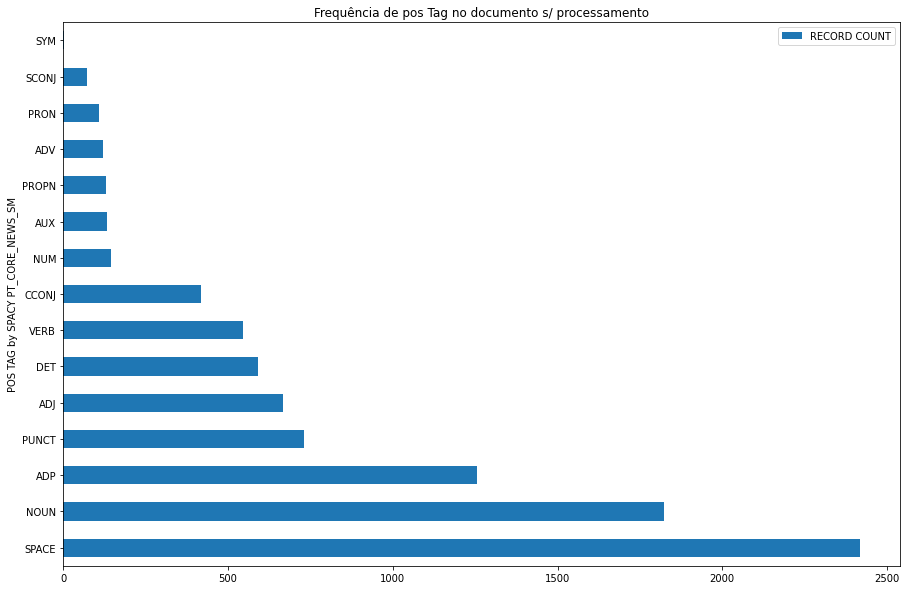

In [11]:
#@title Frequência de incidência de POS TAG no texto:
#@markdown Na linguística computacional, o Part-Of-Speach Taggin ou Marcação de Partes da Linguagem (marcação POS ou marcação PoS ou POST), também chamada de marcação gramatical, é o processo de marcação de uma palavra em um texto (corpus) como correspondente a uma parte específica da fala, com base tanto em sua definição quanto em seu contexto. Uma forma simplificada disso é comumente ensinada a crianças em idade escolar, na identificação de palavras como substantivos, verbos, adjetivos, advérbios, etc.

#@markdown Aqui usaremos a biblioteca SpaCy juntamente com o ToolKit de Processamento de Linguagem Natural para Português do Brasil (pt_core_news_sm) para aferir a frequência de incidência de cada TAG no texto. Esta técnica nos forncece importantes insights para limpesa e processamento destas informações.

#@markdown ---

#@markdown Dicionário de classes em POS TAG:

#@markdown {'SAPCE':Espaco, 'NOUM':Substantivos,'ADP':Adiposicao, 'DET':ArtigoDeterminado, 'PUNCT':Pontuacao, 'VERB':Verbo, 'PROPN':SubstantivoProprio, 'ADJ':Adjetivos, 'CCONJ':ConjuncoesCoordenadas, 'ADV':Adverbios, 'NUM':Numerais, 'PRON':Pronomes, 'SYM':Simbolos, 'AUX':PalavrasAux, 'SCONJ':ConjSubcoordenadas, 'X':Outros}
def posTagCounter(corpora,Title):
  doc = pln(corpora.lower())
  posList=[token.pos_ for token in doc]
  countedPos = Counter(posList) 
  posDF = pd.DataFrame(countedPos.most_common(),columns = ['POS TAG by SPACY PT_CORE_NEWS_SM','RECORD COUNT'])
  return posDF.plot(kind='barh',x='POS TAG by SPACY PT_CORE_NEWS_SM',y='RECORD COUNT',title=Title)

posTagCounter(dataFormated,Title='Frequência de pos Tag no documento s/ processamento')

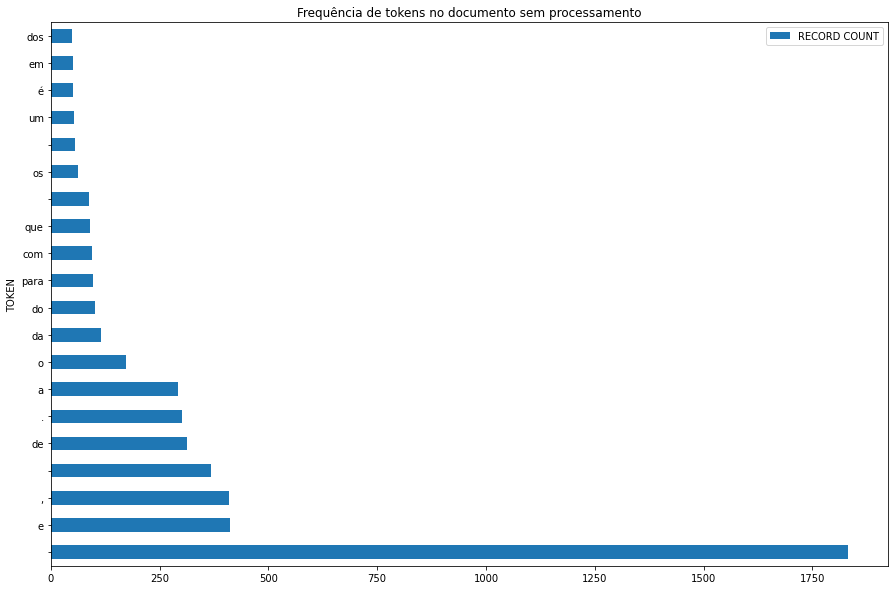

In [12]:
#@title Frequência de incidência de tokens no texto:
#@markdown Na linguística computacional, tokens é o nome que damos para cada entidade indivigual do texto. Podendo ser token uma palavra, uma pontuação ou ainda um sequência específica de strings. A análise de frequência de tokens nos permite visualziar de maneira geral os termos mais incidêntes de um texto. Fornecendo assim insights para o processamento e identificação de palavras-chaves.

#@markdown Usaremos a biblioteca SpaCy juntamente com pt_core_news_sm novamente para separar o texto em tokens e, por fim, usaremos Counter para aferir a frequência de cada token no documento. No gráfico abaixo você pode controlar quantos tokens são mostrados a partir do controlador desta célula.

numeroDeTokens = 20 #@param {'run':'auto','type':'slider','min':1,'max':50,'step':1}

def tokenCounter(corpora,Title,ntokens):
  doc = pln(corpora.lower())
  tokenList=[token.text for token in doc]
  countedText = Counter(tokenList) 
  tokenDF = pd.DataFrame(countedText.most_common(ntokens),columns = ['TOKEN','RECORD COUNT'])
  return tokenDF.plot(kind='barh',x='TOKEN',y='RECORD COUNT',title=Title)

tokenCounter(dataFormated,
             Title='Frequência de tokens no documento sem processamento',
             ntokens = numeroDeTokens)

# Tratamento de Dados Linguísticos

In [13]:
#@title Processamento de texto

#@markdown Para obtermos informações relevantes em corpus textuais é necessário excluirmos todas as entidades que não apresentem significado de sentimento no texto. Isto é artigos, preposições, pontuações, espaçõs e outras entidades que pouco tem a nos fornecer em termos de informações relevantes. Esta classe de termos chamamos de Stop Words.

#@markdown Uma rotina de processamento linguístico pode ser customizada utilizando os parâmetros abaixo:

#@markdown ---
#@markdown Marque para remover Stop Words usando Defaults da biblioteca:
RemoverStopWords = True #@param {type:"boolean"}
#@markdown Marque para adicionar novas stop words:
addStopWords = True #@param {type:"boolean"}

if RemoverStopWords == True:
  stopWords = pln.Defaults.stop_words

if RemoverStopWords == True and addStopWords == True:
  #@markdown Para adicionar novas stop words siga a sintaxe estabelecida. Ex: {"stop_word1","stop_word2","stop_word3","stop_word4","stop_word5"} 
  NovasStopWords = {"a","d","e","será"} #@param {type:'raw'}
  
  pln.Defaults.stop_words |= NovasStopWords
  stopWords = pln.Defaults.stop_words

#@markdown ---
#@markdown Marque as opções permitidas de pos tag:

#@markdown Todas as opções não marcadas serão excluidas do Corpus.  
Espaco = False #@param {type:"boolean"}
Substantivos = True #@param {type:"boolean"}
Adiposicao = True #@param {type:"boolean"}
ArtigoDeterminado = False #@param {type:"boolean"}
Pontuacao = False #@param {type:"boolean"}
Verbo = True #@param {type:"boolean"}
SubstantivoProprio = True #@param {type:"boolean"}
Adjetivos = True #@param {type:"boolean"}
ConjuncoesCoordenadas = True #@param {type:"boolean"}
Adverbios = True #@param {type:"boolean"}
Numerais = True #@param {type:"boolean"}
Pronomes = False #@param {type:"boolean"}
Simbolos = False #@param {type:"boolean"}
PalavrasAux = True #@param {type:"boolean"}
ConjSubcoordenadas = False #@param {type:"boolean"}
Outros = False #@param {type:"boolean"}
#@markdown Execute a célula para implementas as alterações.
classes = {
    'SAPCE':Espaco,'NOUM':Substantivos,'ADP':Adiposicao,'DET':ArtigoDeterminado,
    'PUNCT':Pontuacao,'VERB':Verbo,'PROPN':SubstantivoProprio,'ADJ':Adjetivos,
    'CCONJ':ConjuncoesCoordenadas,'ADV':Adverbios,'NUM':Numerais,'PRON':Pronomes,
    'SYM':Simbolos,'AUX':PalavrasAux,'SCONJ':ConjSubcoordenadas,'X':Outros}
print(f'{datetime.now()} : Regras de classes definidas como : {classes}')
print(f'{datetime.now()} : Processando texto ...')
def removePosTag(corpora:str,permitedClasses:dict):
  doc = pln(corpora.lower())
  permitedClass = [pos for pos,boolean in classes.items() if boolean == True]
  tokenized = []

  for token in doc:
    
    if RemoverStopWords == True:
      
      if token.pos_  in permitedClass and token.text not in stopWords:
        tokenized.append(token.text)
    
    else:
      
      if token.pos_  in permitedClass:
        tokenized.append(token.text)
    
  return ' '.join(tokenized)

tratado = removePosTag(dataFormated,classes)
print(f'{datetime.now()} : Texto processado com sucesso!')
print(f'{datetime.now()} : Resultado : \n {tratado}') 


2022-06-18 14:24:29.202974 : Regras de classes definidas como : {'SAPCE': False, 'NOUM': True, 'ADP': True, 'DET': False, 'PUNCT': False, 'VERB': True, 'PROPN': True, 'ADJ': True, 'CCONJ': True, 'ADV': True, 'NUM': True, 'PRON': False, 'SYM': False, 'AUX': True, 'SCONJ': False, 'X': False}
2022-06-18 14:24:29.204022 : Processando texto ...
2022-06-18 14:24:30.672588 : Texto processado com sucesso!
2022-06-18 14:24:30.672821 : Resultado : 
 2 brasil lula 2023-2026 nacional coletiva brasil organizado progressistas compõem vamos juntos brasil aberto inovador portador apresentado brasil união progressistas democráticas formada pt psol trabalhar eleitoral sobretudo brasil histórico decisivo conclamamos sociais comprometidas somarmos reconstruir brasil resgatando brasileiro partidárias – divulgar 2022 3 vamos juntos brasil 1 brasil precisa resgatar devastado trouxe coloca xeque soberania nacional fulmina público aprofundando condenando internacional brasileira precisa voltar acreditar mudar 

# Análises de Incidência de Entidades




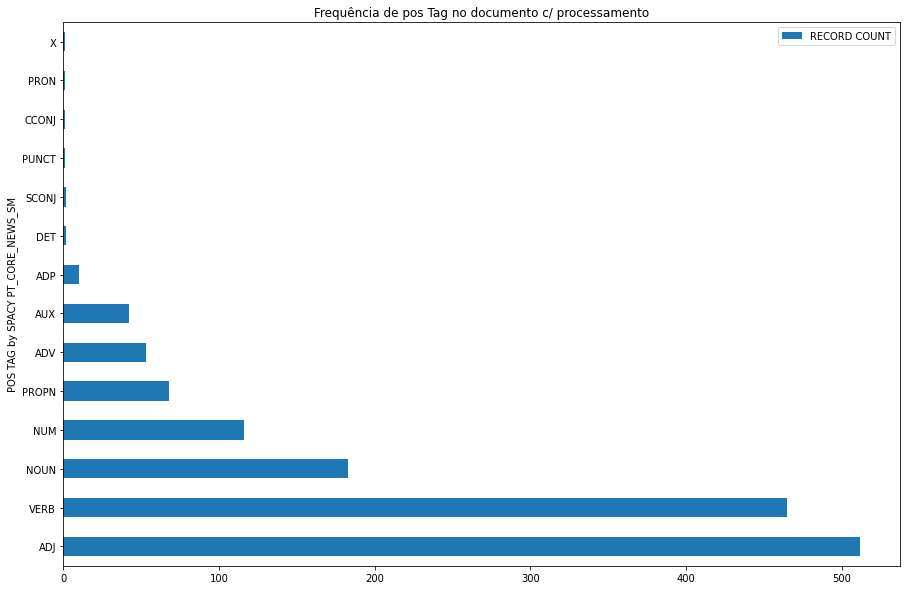

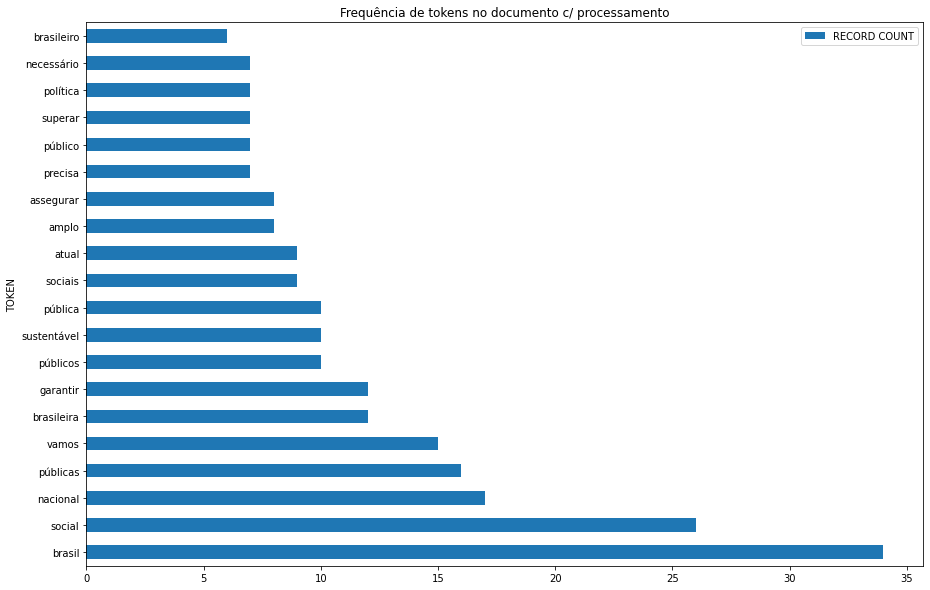

In [14]:
#@title Frequência de incidência de POS TAG e Tokens no texto:
#@markdown Após o processamento repetimos as análises de frequência de POS TAG e Tokens para termos uma visualização clara do resultado de processamento. Em resultados após processamento já é possível obter algumas informações relevantes sobre os conteúdos mais incidentes no texto.

#@markdown  No gráfico abaixo você pode controlar quantos tokens são mostrados a partir do controlador desta célula.
numeroDeTokens = 20 #@param {'run':'auto','type':'slider','min':1,'max':50,'step':1}

posTagCounter(tratado,Title='Frequência de pos Tag no documento c/ processamento')
tokenCounter(tratado,
             Title='Frequência de tokens no documento c/ processamento',
             ntokens = numeroDeTokens)

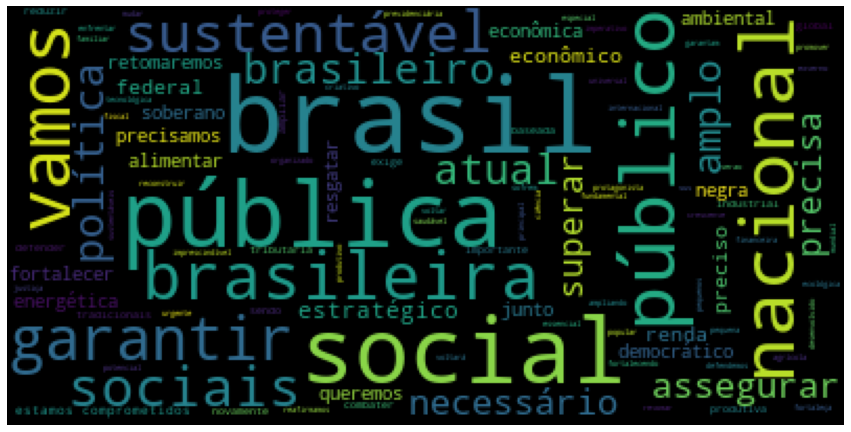

In [15]:
#@title Visualizando núvem de palavra  { run: "auto" }
#@markdown Núvens de Palavras são visualizações representativas onde o tamanho da fonte é proporcional a incidência da palavra em questão no texto. Assim como a análise de frequência de tokens podemos ter uma visualização geral do sentimento mais predominante no texto.

#@markdown Com os controladores a seguir você pode personalizar alguns parâmetros da imagem.
cloudColor= 'black' #@param ['white','black']
maxWords = 100 #@param {'type':'slider','min':1,'max':250,'step':1}
wordcloud = WordCloud(background_color=cloudColor, 
                            max_words=maxWords,
                            max_font_size=50
                            ).generate(tratado)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Análise de Incidência de Sequências de Entidades

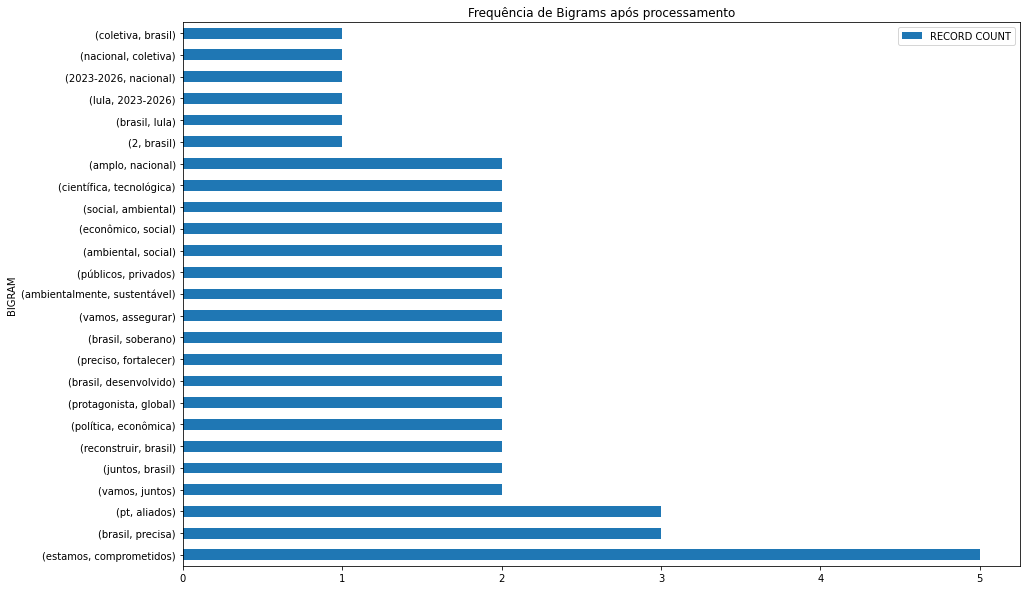

In [16]:
#@title Frequência de Incidência de Bigramas no Texto: {run:'auto'}
#@markdown Em linguística computacional, N-Gramas são sequências de entidades textuais contendo N entidades em cada sequência. No caso específico de incidência de Bi-gramas estamos avaliando a incidência em sequências de duas palavras.

#@markdown Assim como a incidência de tokens, esta análise nos permite uma análise aprofundada sobre o sentimento predominante no texto. Para customizazr o número de Bigramas utilize o controlador a seguir:
def bigramCounter(corpora,Title,n_bigrams):
  doc = pln(corpora.lower())
  tokenList=[token.text for token in doc]
  bigrams = ngrams(tokenList,n=2)
  countedBigrams = Counter(list(bigrams))
  bigramDF = pd.DataFrame(countedBigrams.most_common(n_bigrams),columns = ['BIGRAM','RECORD COUNT'])
  return bigramDF.plot(kind='barh',x='BIGRAM',y='RECORD COUNT',title=Title)

NdeBigrams = 25 #@param {type:'slider',min:1,max:100,step:1}
bigramCounter(tratado,Title='Frequência de Bigrams após processamento',n_bigrams=NdeBigrams)

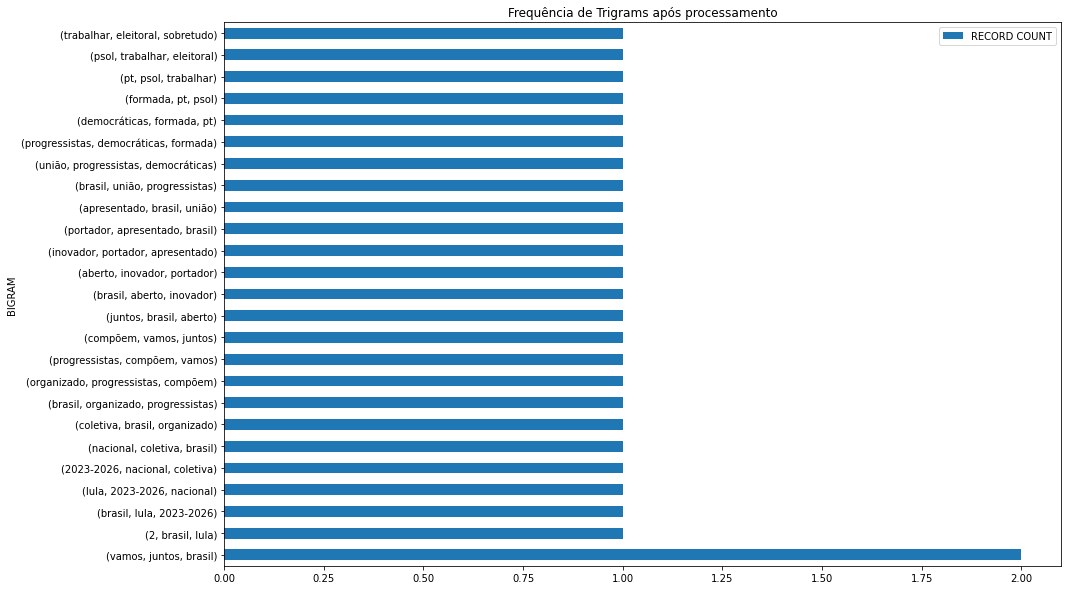

In [17]:
#@title Frequência de Incidência de Trigramas no Texto: {run:'auto'}
#@markdown Seguindo a mesma linha de visualizações, analisamos agora a incidência de sequências de três palavras do documento.
#@markdown Para customizazr o número de Bigramas utilize o controlador a seguir:
def trigramCounter(corpora,Title,n_bigrams):
  doc = pln(corpora.lower())
  tokenList=[token.text for token in doc]
  bigrams = ngrams(tokenList,n=3)
  countedBigrams = Counter(list(bigrams))
  trigramDF = pd.DataFrame(countedBigrams.most_common(n_bigrams),columns = ['BIGRAM','RECORD COUNT'])
  return trigramDF.plot(kind='barh',x='BIGRAM',y='RECORD COUNT',title=Title)
NdeTrigrams = 25 #@param {type:'slider',min:1,max:100,step:1}
trigramCounter(tratado,Title='Frequência de Trigrams após processamento',n_bigrams=NdeTrigrams)

# Análise de Incidência utilizando Named-Entity Recognition (NER)

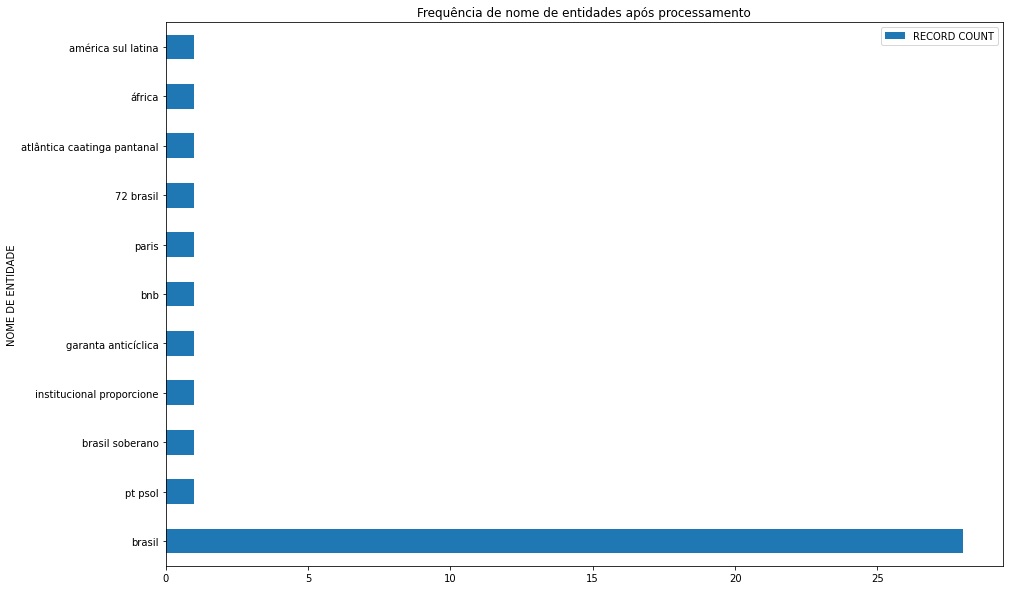

In [18]:
#@title Frequência de Incidência de Entidades Nomeadas no Texto: {run:'auto'}
#@markdown Entidades Nomeadas, em linguistica computacional, refere-se a entidades linguísticas que se refiram a nomes específicos. Como por exemplo o nome de um país, instituição ou pessoa. Avaliar a frequência de incidência em Entidades Nomeadas de um texto nos fornece uma visualização sobre interações do autor do documento com entidades possivelmente conhecidas pelo público.

#@markdown Para esta análise utilizaremos a técnica de aprendizado de máquinas Named-entity recognition (NER) com auxilio das bibliotecas SpaCy e seu modelo NER pré-treinado no ToolKit PT-BR , Counter para avaliar a incidência e Pandas para tarefas de dados.

#@markdown É possível customizar o número de entidades no gráfico utilizando a controlador desta célula.
def showNERGraph(corpora,Title,n):
  doc = pln(corpora.lower())
  near = doc.ents
  CountedNER = Counter([str(i) for i in near])
  nerDF = pd.DataFrame(CountedNER.most_common(n),columns = ['NOME DE ENTIDADE','RECORD COUNT'])
  return nerDF.plot(kind='barh',x='NOME DE ENTIDADE',y='RECORD COUNT',title=Title)

nEntidades = 25 #@param {type:'slider',min:1,max:25,step:1}
showNERGraph(tratado,
        Title='Frequência de nome de entidades após processamento',
        n=nEntidades)

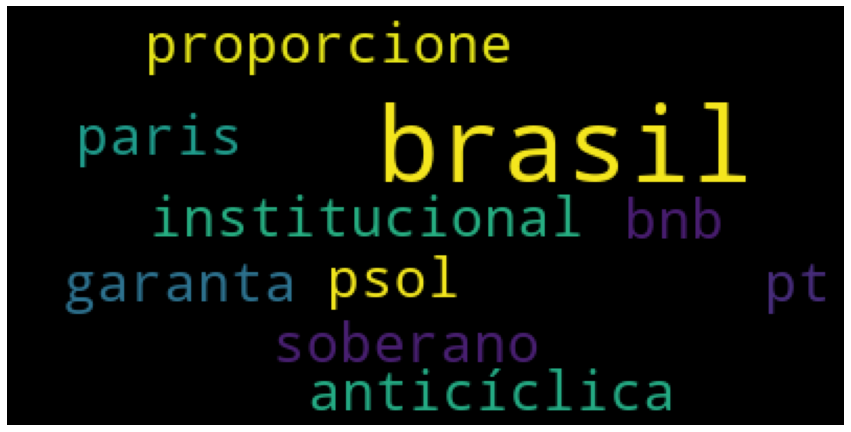

In [19]:
#@title Núvem de Palavras de Entidades Nomeadas no Texto: {run:'auto'}
#@markdown Continuando a linha de análises em entidades nomeadas, podemos utilizar a técnica de núvem de palavras para obtermos uma visualização mais direta dos resultados obtidos por meio destas técnicas.
def showNERCloud(corpora,maxWords,color):
  doc = pln(corpora.lower())
  near = doc.ents
  nearString = ' '.join([str(i) for i in near])
  wordcloud = WordCloud(background_color=color, 
                            max_words=maxWords,
                            max_font_size=50
                            ).generate(nearString)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
  return wordcloud

cloudColor= 'black' #@param ['white','black']
maxWords = 10 #@param {'type':'slider','min':1,'max':50,'step':1}
showNERCloud(tratado,maxWords=maxWords,color = cloudColor)

# Análise de Incidência por Lematização de Entidades

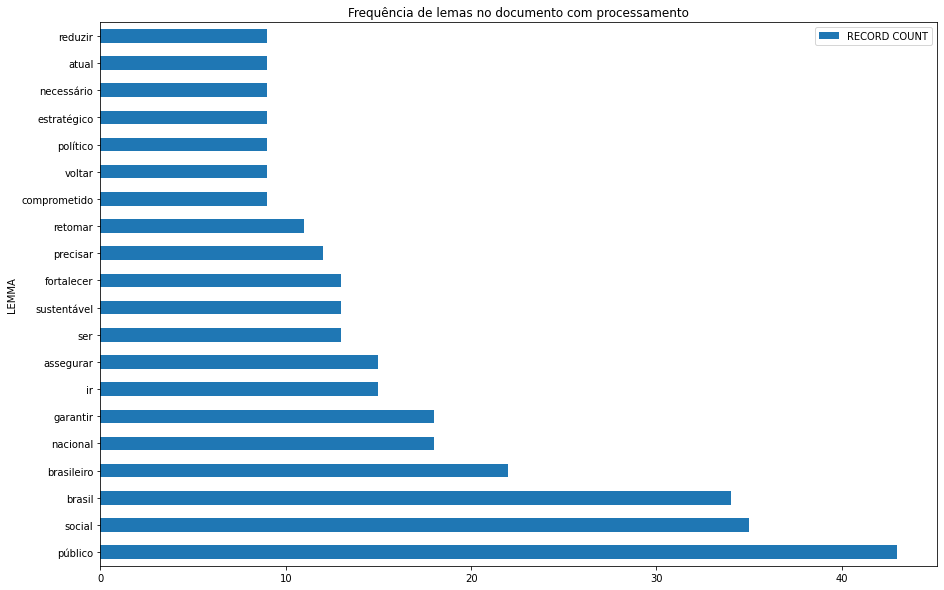

In [20]:
#@title Frequência de lemas no texto {'run':'auto'}
#@markdown Em linguística computacional, lemas são radicais de palavras livres de inflexões. Sendo assim, lematização é o processo computacional de reduzir uma palavra a sua forma primitiva (radical). Como por exemplo as palavras 'Conseguiremos' e 'Conseguiram' referem-se ao mesmo radical 'Conseguir'. Por meio desta técnica somos capazes de generalizar palavras que possuem o mesmo sentimento em um único termo, gerando diferenças potencialmente significativas na sua incidência no corpus.

#@markdown É possível customizar o número de lemas mostrados pelo gráfico utilizando a controlador desta célula.
numeroDeLemmas = 20 #@param {'type':'slider','min':1,'max':50,'step':1}

def lemmaCounter(corpora,Title,ntokens):
  doc = pln(corpora.lower())
  tokenList=[token.lemma_ for token in doc]
  countedText = Counter(tokenList) 
  tokenDF = pd.DataFrame(countedText.most_common(ntokens),columns = ['LEMMA','RECORD COUNT'])
  return tokenDF.plot(kind='barh',x='LEMMA',y='RECORD COUNT',title=Title)

lemmaCounter(tratado,
             Title='Frequência de lemas no documento com processamento',
             ntokens = numeroDeTokens)

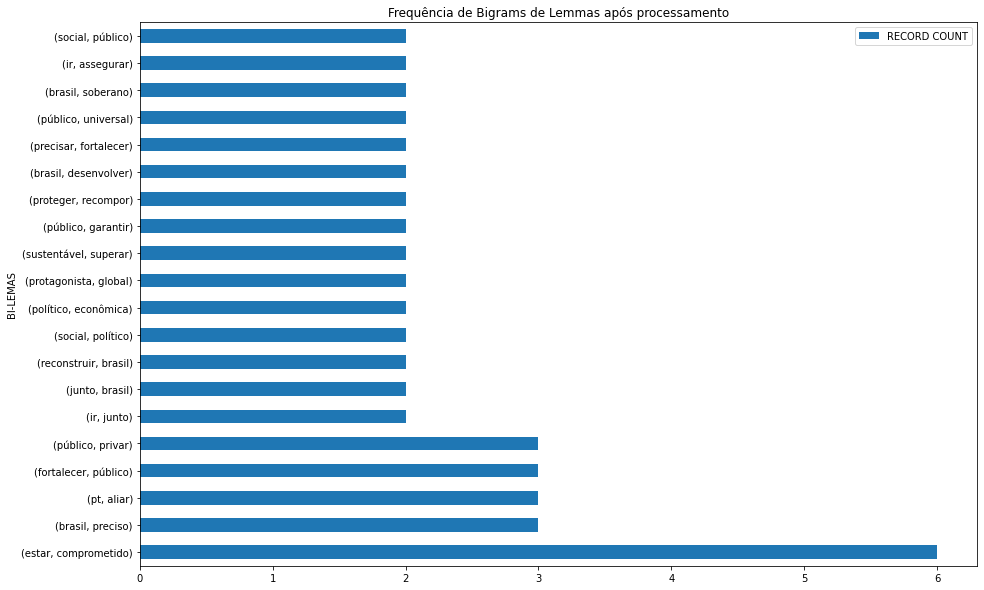

In [21]:
#@title Frequência de bigramas de lemas no texto {'run':'auto'}
#@markdown Prosseguindo na mesma linha de análise podemos visualizar pares de lemas e suas respectivas incidências no texto.
def biLemmaCounter(corpora,Title,n_bigrams):
  doc = pln(corpora.lower())
  tokenList=[token.lemma_ for token in doc]
  bigrams = ngrams(tokenList,n=2)
  countedBigrams = Counter(list(bigrams))
  bigramDF = pd.DataFrame(countedBigrams.most_common(n_bigrams),columns = ['BI-LEMAS','RECORD COUNT'])
  return bigramDF.plot(kind='barh',x='BI-LEMAS',y='RECORD COUNT',title=Title)
numeroDeBiLemas = 20 #@param {'type':'slider','min':1,'max':50,'step':1}
biLemmaCounter(tratado,Title='Frequência de Bigrams de Lemmas após processamento',n_bigrams=numeroDeBiLemas)

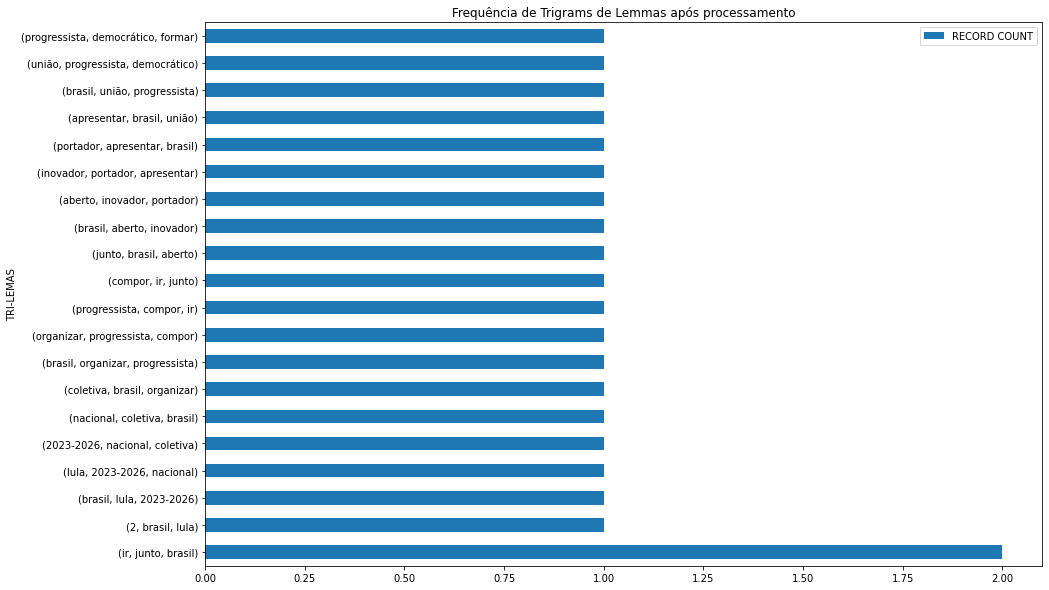

In [22]:
#@title Frequência de trigramas de lemas no texto {'run':'auto'}
#@markdown Prosseguindo na mesma linha de análise podemos visualizar sequências de três lemas e suas respectivas incidências no texto.

def triLemmaCounter(corpora,Title,n_trigrams):
  doc = pln(corpora.lower())
  tokenList=[token.lemma_ for token in doc]
  bigrams = ngrams(tokenList,n=3)
  countedBigrams = Counter(list(bigrams))
  bigramDF = pd.DataFrame(countedBigrams.most_common(n_trigrams),columns = ['TRI-LEMAS','RECORD COUNT'])
  return bigramDF.plot(kind='barh',x='TRI-LEMAS',y='RECORD COUNT',title=Title)
numeroDeTriLemas = 20 #@param {'type':'slider','min':1,'max':50,'step':1}
triLemmaCounter(tratado,Title='Frequência de Trigrams de Lemmas após processamento',n_trigrams=numeroDeTriLemas)

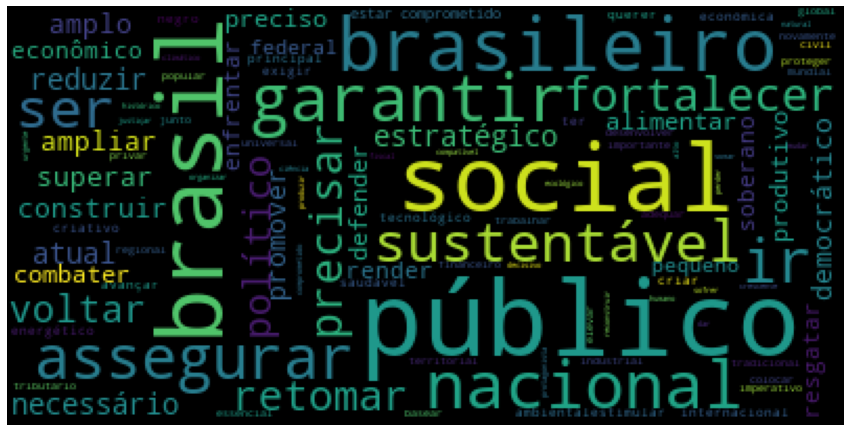

In [23]:
#@title Núvem de Palavras utilizando Lematização {'run':'auto'}
#@markdown Finalmente construimos uma núvem de palavras a partir dos lemas mais presentes no texto.
def showLEMMACloud(corpora,maxWords,color):
  doc = pln(corpora.lower())
  lemmaString = ' '.join([str(i.lemma_) for i in doc])
  wordcloud = WordCloud(background_color=color, 
                            max_words=maxWords,
                            max_font_size=50
                            ).generate(lemmaString)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
  return wordcloud

cloudColor= 'black' #@param ['white','black']
maxWords = 100 #@param {'type':'slider','min':1,'max':250,'step':1}
showLEMMACloud(tratado,maxWords=maxWords,color = cloudColor)

# Próximos passos

  Como sugestões de continuidade para exploração desse tipo de documento, é recomendado duas linhas distintas de pensamento. Uma remete-se à um aprofundamento técnico em termos de análises e outra à medidas comparativas com o que já existe de procedimento reprodutível neste notebook.

  No primeiro caso, onde buscamos nos aprofundar tecnicamente no que diz respeito ao processamento de linguagem natural, podemos citar a ténica de visualizações de grafos de rede como uma possível continuidade. Além desta é possível aplicar inferência com modelos generativos para obter dados a partir de sequências de entidades.

  Em paralelo podemos conduzir medidas comparativas dos métodos estabelecidos por este notebook com documentos publicados com outros candidatos a presidência. Para assim constatar potenciais diferenças linguisticas, e por consequência de sentimentos, nas plataformas de governos discutidas diferentes partidos políticos.  